In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../data/final_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 

# Using close and sentiment score
data = df[['Close', 'avg_sentiment']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)



In [6]:
def create_sequences(data, window_size):
    x, y = [], []
    for i in range(len(data) - window_size):
        x.append(data[i:i + window_size])
        y.append(data[i + window_size][0]) # Close price is the target
    return np.array(x), np.array(y)

window_size = 60 
x, y = create_sequences(scaled_data, window_size)

# split the data into training and testing sets
split = int(len(x)* 0.8) # 80% of 210 samples for training
x_train, x_test = x[:split], x[split:] # 0-191 for training, 192-239 for testing
y_train, y_test = y[:split], y[split:]

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 2)) # 2 features: Close and avg_sentiment
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 2))

#print(x.shape, y.shape)

Epoch 1/60


c:\Users\priya\Downloads\stock-market-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.3192 - val_loss: 0.0523
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0278 - val_loss: 0.0143
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0254 - val_loss: 0.0220
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0186 - val_loss: 0.0131
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0209 - val_loss: 0.0162
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0167 - val_loss: 0.0159
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0165 - val_loss: 0.0124
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0175 - val_loss: 0.0189
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0152 - val_loss: 0.0164
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0158 - val_loss: 0.0158
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0157 - val_loss: 0.0131
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0159 - val_l

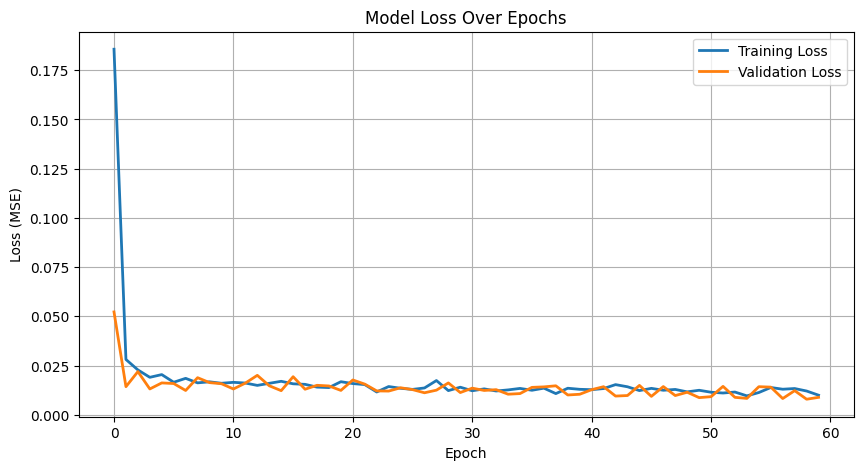

In [20]:
import tensorflow as tf 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=60, batch_size=16, validation_data=(x_test, y_test), verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


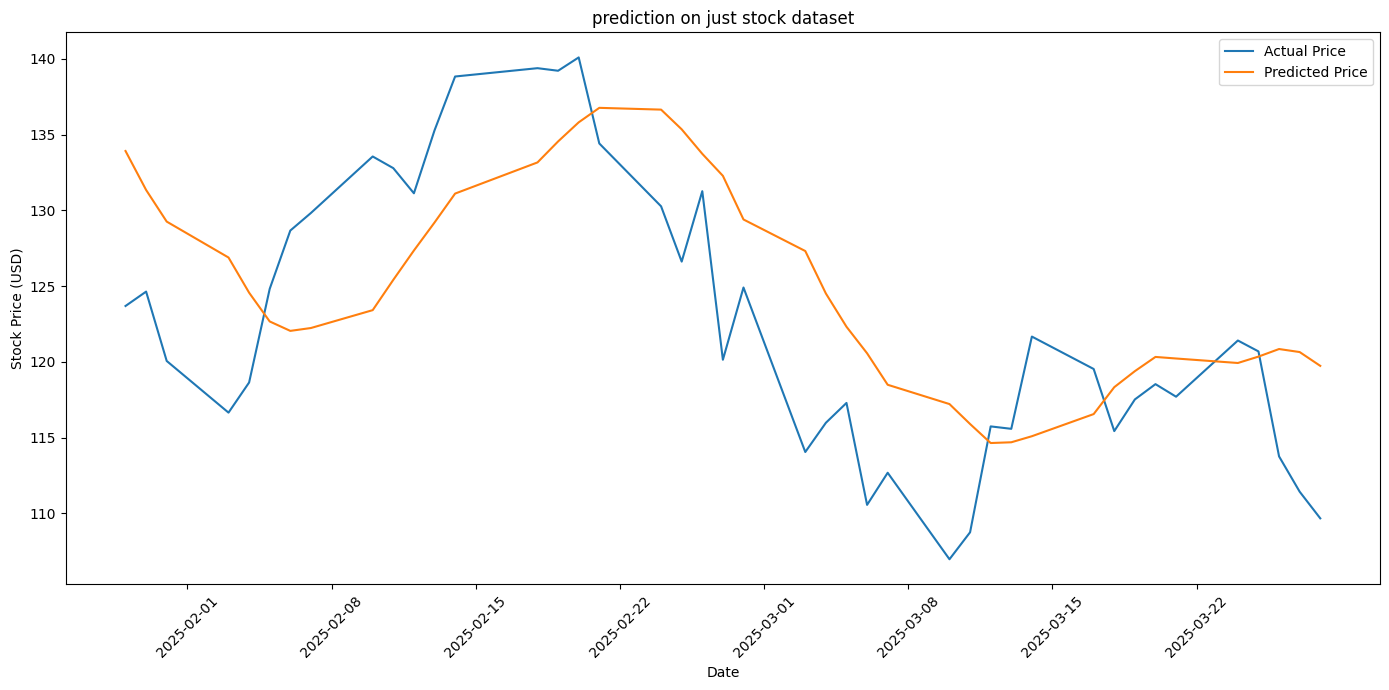

In [ ]:
predicted = model.predict(x_test) #predicting based on the test set

predicted_extended = np.zeros((predicted.shape[0], 2))
predicted_extended[:, 0] = predicted[:, 0]

actual_extended = np.zeros((y_test.shape[0], 2))
actual_extended[:, 0] = y_test

predicted_inversed = scaler.inverse_transform(predicted_extended)[:, 0]
actual_inversed = scaler.inverse_transform(actual_extended)[:, 0]

test_dates = df.index[-len(y_test):]

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(test_dates, actual_inversed, label='Actual Price')
plt.plot(test_dates, predicted_inversed, label='Predicted Price')
plt.title('prediction on just stock dataset')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [22]:
model.save('../models/lstm_stock&sentiment.h5')

In [23]:
import joblib
joblib.dump(scaler, '../models/scaler_stock&sentiment.save')

['../models/scaler_stock&sentiment.save']